In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression #Lasso回归、岭回归，线性回归，逻辑回归
from sklearn.model_selection import train_test_split #自动进行切割
from sklearn.model_selection import GridSearchCV #表格搜索
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor #KNN回归
from sklearn.ensemble import ExtraTreesRegressor #随机森林
import sklearn.datasets as datasets #导入内置数据
import ssl 

In [16]:
faces = datasets.fetch_olivetti_faces()
data = faces.data #人脸照片数据
images = faces.images #人脸照片
targets = faces.target #人物标签号

#ps: data[i].reshape(64,64)=images[i]

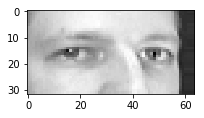

In [28]:
plt.figure(figsize=(3,2))
plt.imshow(X_train[4].reshape((32,64)),cmap='gray')

In [35]:
train = data[targets<30]
test = data[targets>=30]
X_train = train[:,:2048] #上半脸
Y_train = train[:,2048:]  #下半脸
X_test = test[:,:2048]
Y_test = test[:,2048:]  

In [32]:
Estimators = {'KNN': KNeighborsRegressor(),
              'LR' : LinearRegression(),
              'Ridge' : Ridge(alpha=0.5),
             'Lasso' : Lasso(alpha=0.5),
             'ETR' : ExtraTreesRegressor()
             }

In [58]:
y_predicts = {} #预测值保存至字典
for key,estimator in Estimators.items():
    estimator.fit(X_train,Y_train)
    Y_predict = estimator.predict(X_test)
    y_predicts[key] = Y_predict
    

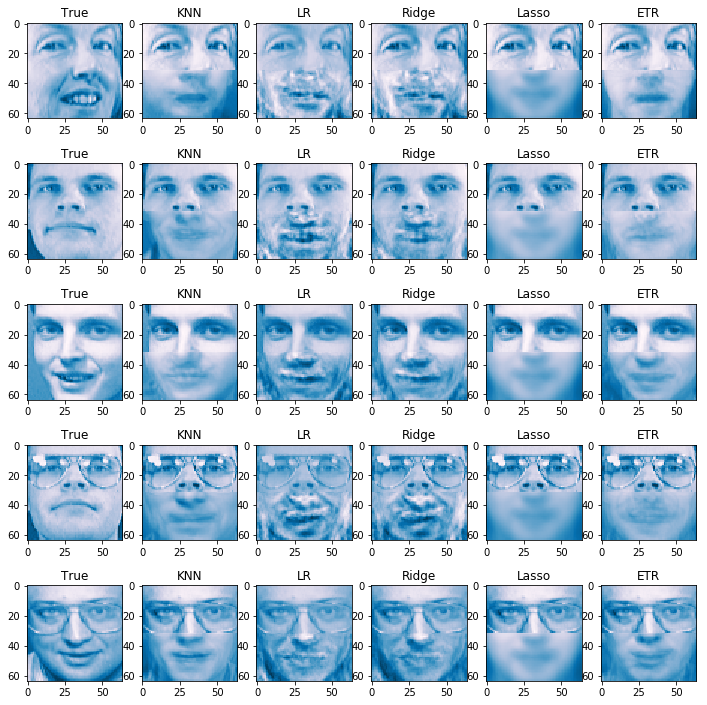

In [73]:
face_id = np.random.randint(0,100,size=5)
plt.figure(figsize=(6*2,5*2.5))
for i in range(5):
    axes = plt.subplot(5,6,i*6+1,title='True')
    axes.imshow(test[face_id[i]].reshape(64,64),cmap='gray')
    for index,title in enumerate(y_predicts):
        axes = plt.subplot(5,6,6*i+index+2,title=title)
        face_up = X_test[face_id[i]]
        face_down = y_predicts[title][face_id[i]]
        face = np.hstack((face_up,face_down)).reshape(64,64)   
        axes.imshow(face,cmap='gray')



0
KNN
1
LR
2
Ridge
3
Lasso
4
ETR
